# Machine learning for medicine
## Linear Regression

## Overview
Linear regression is a fancy way of saying: let's find the line that relates variables.
The real power of linear regression is clear when we've got way, way more than just two variables.
In this notebook we'll start with a brief intro of linear regression with two variables, then show how it can work with many more, and finally demonstrate the power of machine learning in messy data.

As always, there's code and interactive widgets all along the way.

### Code Setup

In [86]:
# The big library for doing math + data in python
import numpy as np

# A big library that has a lot of useful functions for scientific use of python
import scipy

# The main library for plotting
import matplotlib.pyplot as plt

# The main library used for statistics
import scipy.stats as stats

# The library we're going to use for our linear regression
from sklearn.linear_model import LinearRegression

# Libraries that let us use interactive widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Misc stuff related to cleaning up code and displaying results in a pretty way
from example_systems import *
from IPython.display import Markdown as md

## Linear Regression (simple)
Let's say we're trying to see whether there's a relationship between a patient's A1c and their blood glucose.

In [87]:
# the ground truth
a1c_b = np.linspace(0,20,1)

First, for this exercise, we defined the *truth*: that the blood glucose is just the A1c times a *conversion factor* which is $\frac{100}{6} \approx 16.6667$

In [88]:
# Let's define *the truth* so that we can compare our data-driven analysis to something concrete
conversion_factor = (1/6) * 100
truth = lambda x: conversion_factor * x

Next, we're going to *simulate* a study with a certain number of patients.

In [89]:
num_pts = 10
# The data we (simulated) collected from paWtients
exp_1_a1c = np.random.uniform(0,15,size=(num_pts,1))
exp_1_bgluc = truth(exp_1_a1c) + np.random.normal(0,20,size=(num_pts,1))

Let's see what the data from the experiment looks like:

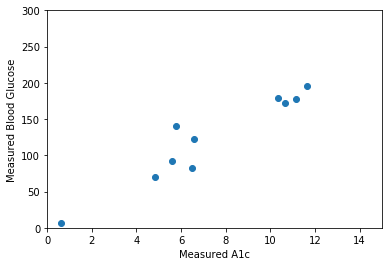

In [90]:
def plot_data(a1c,bgluc):
    plt.figure()
    plt.scatter(a1c,bgluc)
    plt.xlabel('Measured A1c')
    plt.ylabel('Measured Blood Glucose')
    plt.xlim((0,15))
    plt.ylim((0,300));
    
plot_data(exp_1_a1c,exp_1_bgluc)

In [91]:
x = exp_1_a1c.reshape(-1,1)
y = exp_1_bgluc.reshape(-1,1)
reg = LinearRegression(fit_intercept=True).fit(x, y)
reg.score(x, y)

slope_estimate = reg.coef_[0,0]
print('Regression slope is ' + str(slope_estimate))
#reg.intercept_

Regression slope is 16.39636301687118


How close are we to the true slope16.666666666666664 ?

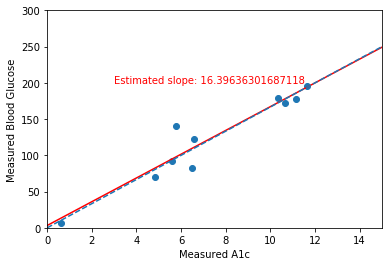

In [92]:
plot_data(exp_1_a1c,exp_1_bgluc)

#Now let's plot the lines that we think link our variables
x_fix = np.linspace(0,15,100)
plt.plot(x_fix,slope_estimate * x_fix + reg.intercept_,'red')
plt.text(3,200,'Estimated slope: ' + str(slope_estimate),color='red')
plt.plot(x_fix,truth(x_fix),'--')

md("How close are we to the true slope" + str(conversion_factor) + " ?")

The goal in any linear regression is to *figure out* what the true conversion-factor is using the *data*.

What we did here was take data from our (simulated) patients and fit a line between the datapoints to see if we could *infer* the true relationship between A1c and blood glucose. 
Turns out we can!
Even if it's not perfect, the linear regression approach let us see that there's an *association* between the two variable.


## More advanced Linear Regression
Let's make things more complicated.
We know that the blood glucose we measure from our patients depends on a *lot* of other factors.
The A1c gives us a good idea of what the blood glucose is but other measurements may help get an even better idea.

So now we're going to do *multiple regression*.
Here, we have many independent variables but still only one dependent variable.
It's pretty much impossible for us to *visualize* this in the same way we did in the Simple Linear Regression example, but that's just going to show us how powerful linear regression is in finding things that we can't easily see.


## Even more advanced Linear Regression
Finally, we're going to end on a real-world note: outliers.
There are always going to be problems with some of the data you collected.
Maybe the measurement device was broken that day, maybe the patient told you they were not diabetic but they actually are.
This can lead to datapoints that are *outliers*, or inappropriately included in the analysis.
These outliers can introduce major problems into analysis that we can use more advanced linear regression (simple machine learning) to overcome.


### Outliers
Let's start with the same 2-variable example we had above but add an outlier datapoint.

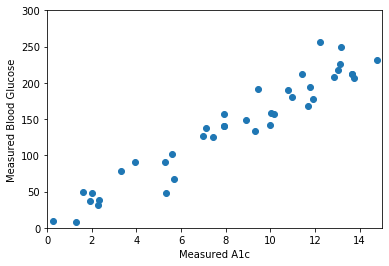

In [93]:
# The data we (simulated) collected from patients
num_pts = 40
exp_2_a1c = np.random.uniform(0,15,size=(num_pts,1))
exp_2_bgluc = truth(exp_2_a1c) + np.random.normal(0,20,size=(num_pts,1))

plot_data(exp_2_a1c,exp_2_bgluc)

Plus one patient that we collected with measurements that look really, really weird...

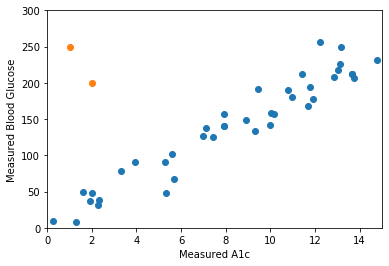

In [94]:
plot_data(exp_2_a1c,exp_2_bgluc)

ol_a1c = np.array([2,1]).reshape(-1,1)
ol_bgluc = np.array([200,250]).reshape(-1,1)

plt.scatter(ol_a1c,ol_bgluc);

Let's do our standard linear regression on this dataset

In [95]:
full_exp_2_a1c = np.vstack((exp_2_a1c,ol_a1c))
full_exp_2_bgluc = np.vstack((exp_2_bgluc,ol_bgluc))

In [96]:
x = full_exp_2_a1c.reshape(-1,1)
y = full_exp_2_bgluc.reshape(-1,1)
reg = LinearRegression(fit_intercept=True).fit(x, y)
reg.score(x, y)

slope_estimate = reg.coef_[0,0]
print('Regression slope is ' + str(slope_estimate))

Regression slope is 12.747179051156282


In [97]:
x = exp_2_a1c.reshape(-1,1)
y = exp_2_bgluc.reshape(-1,1)
reg_nol = LinearRegression(fit_intercept=True).fit(x, y)
reg_nol.score(x, y)

0.9241021319858838

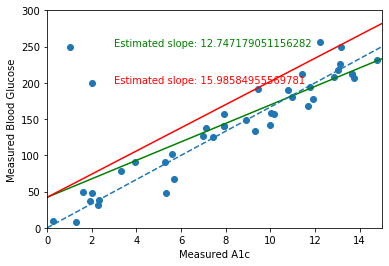

In [98]:
plot_data(full_exp_2_a1c,full_exp_2_bgluc)

#Now let's plot the lines that we think link our variables
x_fix = np.linspace(0,15,100)
plt.plot(x_fix,reg.coef_[0,0] * x_fix + reg.intercept_,'green')
plt.text(3,250,'Estimated slope: ' + str(reg.coef_[0,0]),color='green')
plt.plot(x_fix,reg_nol.coef_[0,0] * x_fix + reg.intercept_,'red')
plt.text(3,200,'Estimated slope: ' + str(reg_nol.coef_[0,0]),color='red')
plt.plot(x_fix,truth(x_fix),'--');

The true model is depicted by the dotted blue line.
The linear regression model *with outliers* is depicted by the green line.
The linear regression model that *ignored the outliers* is depicted by the red line.

The green line is pretty off from the true association.

As we see, the red line comes pretty close to estimating the true association.
We, however, do also see that it's shifted up a bit due to the "pull" of the outliers.

### Robust Regression

How do we "see through" the outliers?
In the before-days, we might say that those two points look like outliers and/or we had reason to suspect the lab had issues on those days so it's reasonable for us to *ignore* those two datapoints in our analysis.
This can be done responsibly, but let's leverage math to achieve the same goal in a much more trustworthy way.

Some types of regression are called *robust* if they can find the true association even in the presence of outliers like the two troublemakers we see here.

Let's use [RANSAC]() which takes a subset of the data to make a model, and does this 100 times to calculate the model that makes "the most sense", even with the outliers present.